In [15]:
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# reading data from file
with open(r"data\BankNote_Authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)
    
    data = []
    for row in reader:
        data.append({
            "feature": [float(cell) for cell in row[:4]],
            "label": 1 if row[4] == "0" else 0
        })

In [17]:
# performing train, test split
feature = [row["feature"] for row in data]
label = [row["label"] for row in data]

x_training, x_testing, y_training, y_testing = train_test_split(feature, label, test_size=0.30)

In [18]:
# preparing neural network
model = tf.keras.models.Sequential()
# hidden layer with 8 artificial neurons each with ReLu activation getting 4 inputs from features
model.add(tf.keras.layers.Dense(8, input_shape=(4,), activation="relu"))
# output layer to return probablity between 0 and 1 hence with sigmoid activation
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [19]:
# compiling the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [20]:
# training the model
history = model.fit(x_training, y_training, epochs=20, validation_data=(x_testing,  y_testing))

Epoch 1/20
30/30 [==============================] - 0s 5ms/step - loss: 0.7506 - accuracy: 0.4719 - val_loss: 0.6878 - val_accuracy: 0.5510
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6271 - val_loss: 0.5893 - val_accuracy: 0.6917
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7198 - val_loss: 0.5291 - val_accuracy: 0.7233
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7573 - val_loss: 0.4863 - val_accuracy: 0.7500
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7844 - val_loss: 0.4509 - val_accuracy: 0.7864
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8062 - val_loss: 0.4203 - val_accuracy: 0.8180
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8292 - val_loss: 0.3918 - val_accuracy: 0.8325
Epoch 8/20
30/30 [==

13/13 - 0s - loss: 0.1329 - accuracy: 0.9733 - 38ms/epoch - 3ms/step


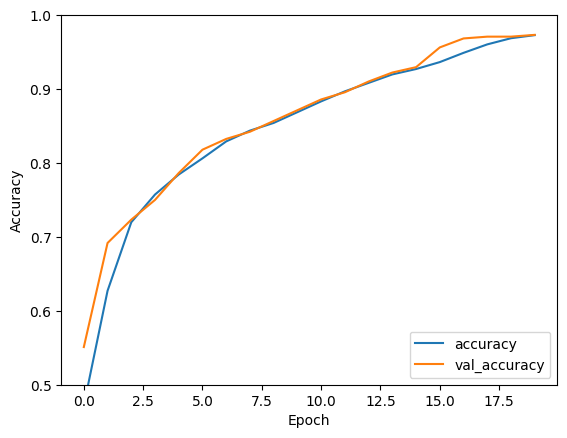

In [21]:
# plotting evaluation graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model and storing results
test_loss, test_acc = model.evaluate(x_testing,  y_testing, verbose=2)